In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('fast_food_consume.csv')

In [3]:
df.head()

,Age,Consumption
0,11,0
1,22,0
2,45,0
3,56,1
4,40,1


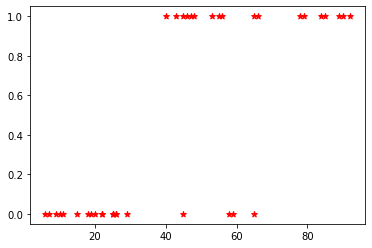

In [4]:
plt.scatter(df['Age'],df['Consumption'],marker='*',color='red')

In [5]:
x=df.iloc[:,0]
y=df.iloc[:,-1]


In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
x_train_reshaped = np.array(x_train).reshape(-1, 1)

In [8]:
x_train_reshaped.shape

(31, 1)

In [9]:
x_test_reshaped = np.array(x_test).reshape(-1, 1)

In [10]:
x_test_reshaped.shape

(8, 1)

In [11]:
y_train.shape

(31,)

In [12]:
from sklearn.linear_model import LogisticRegression
li=LogisticRegression()
li

LogisticRegression()

In [13]:
li.fit(x_train_reshaped,y_train)

LogisticRegression()

In [14]:
y_pred=li.predict(x_test_reshaped)

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.75

In [16]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [17]:

y_test

33    1
36    0
4     1
13    0
30    1
26    1
6     0
27    1
Name: Consumption, dtype: int64

In [18]:
print("Predictions (y_pred):", y_pred)
print("True labels (y_test):", y_test.values)

Predictions (y_pred): [0 0 0 0 1 1 0 1]
True labels (y_test): [1 0 1 0 1 1 0 1]


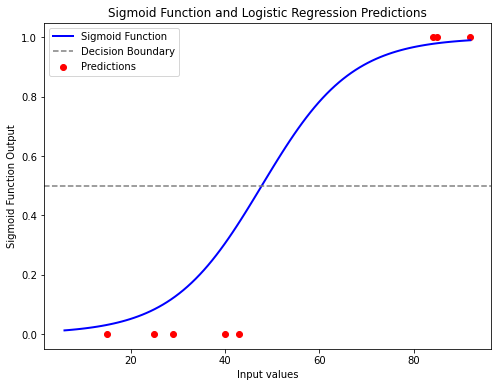

In [21]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)
y_values = sigmoid(li.coef_ * x_values + li.intercept_)

plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_pred, color='red', label='Predictions', marker='o')
plt.plot(x_values, y_values, label='Sigmoid Function', color='blue', linewidth=2)
plt.axhline(0.5, color='gray', linestyle='--', label='Decision Boundary')
plt.xlabel('Input values')
plt.ylabel('Sigmoid Function Output')
plt.title('Sigmoid Function and Logistic Regression Predictions')
plt.legend()
plt.show()